In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.utils.validation import check_is_fitted

In [2]:
def wrangle(db_path):

    # Read query results into DataFrame
    df = pd.read_csv(db_path)
    
    
    return df

In [3]:
df = wrangle(r"C:\Users\MEER\Downloads\creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**That's solid information. We know all our features are numerical and that we have no missing data. But, as always, it's a good idea to do some visualizations to see if there are any interesting trends or ideas we should keep in mind while we work. First, let's take a look at how many transactions are fradulent, and how many are not.** 

In [5]:
df["Class"].value_counts(normalize = True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

<AxesSubplot:title={'center':'class balance'}, xlabel='class', ylabel='Relative frequency'>

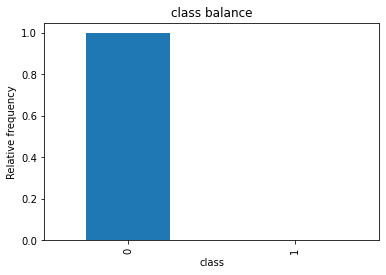

In [7]:
# Plot value counts of `"severe_damage"`
df["Class"].value_counts(normalize = True).plot(

    kind="bar", xlabel = "class", ylabel = "Relative frequency", title = "class balance"
    
)

In [59]:
majority_class_prop, minority_class_prop = df["Class"].value_counts(normalize = True)
print(f"Class that are not fraudulent is {majority_class_prop} %\nAnd class that are fraudulent {minority_class_prop} %")

Class that are not fraudulent is 0.9982725143693799 %
And class that are fraudulent 0.001727485630620034 %


That's good news for us! Since it looks like most of the Transactions in our dataset are doing all right for themselves, let's drill down a little farther. However, it also shows us that we have an `**imbalanced dataset**`, where our majority class is far bigger than our minority class.

Above, we saw that there are 31 features of each **transaction**, each of which has some kind of numerical value. It might be useful to understand where the values for one of these features cluster, so let's make a boxplot to see how the values in `"Amount"` are distributed.

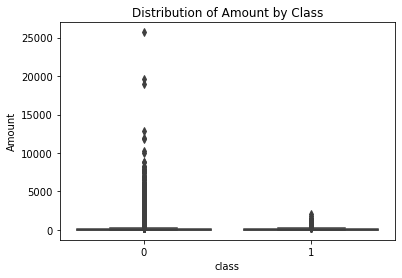

In [60]:
# Create boxplot
sns.boxplot(x="Class", y="Amount", data = df)
# Label axes
plt.xlabel("class")
plt.ylabel("Amount")
plt.title("Distribution of Amount by Class");

**Why does this look so funny?** Remember that `boxplots` exist to help us see the `quartiles` in a dataset, and this one doesn't really do that. Let's check the distribution of `"Amount"` to see if we can figure out what's going on here.

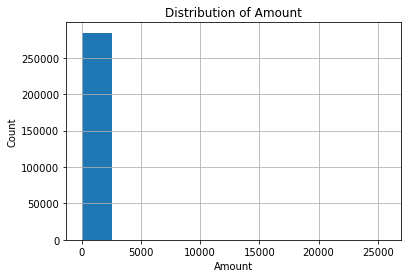

In [61]:
# Plot histogram of `feat_27`
df["Amount"].hist()
plt.xlabel("Amount")
plt.ylabel("Count"),
plt.title("Distribution of Amount");

`Aha!` We saw it in the numbers and now we see it in the `histogram`. The data is very positively skewed. So, so it is not normaly distributed. Which is also shows that our dataset is `imbalanced`.

<div class="alert alert-info" role="alert">
    <b>Note:</b> we never perform classification algorithm on <code>Imbalanced dataset</code>. Don't worry, it's normal!
</div>

​So what did we learn from this EDA? our data is imbalanced. This is something we need to address in our data preparation. 

# Split

In [21]:
target = "Class"
X =df.drop(columns=target)
y = df[target]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (284807, 30)
y shape: (284807,)


In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.0004, random_state = 42
)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (284693, 30)
y_train shape: (284693,)
X_test shape: (114, 30)
y_test shape: (114,)


# Resembling
one stratigy to remsembling the training data

In [34]:
under_sampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)
print(X_train_under.shape)
X_train_under.head()

(982, 30)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
203412,134807.0,1.584291,-1.474597,-1.004173,-0.646316,-0.926309,-0.435357,-0.395433,-0.070519,1.659639,...,0.334692,0.302166,0.401885,-0.021877,0.638184,-0.413246,0.657407,-0.096026,-0.004701,260.00
74881,55797.0,-0.463700,0.596264,0.916599,-1.811021,0.616774,-0.194882,0.795308,-0.065786,0.382424,...,0.068244,0.154709,0.579232,-0.430625,-0.878581,0.506010,-0.527101,0.138009,0.093388,22.87
221914,142746.0,2.000199,-1.863955,-0.235860,-1.455256,-1.952438,-0.443499,-1.457046,0.005529,-1.112370,...,-0.219897,-0.202531,-0.368972,0.340204,0.018639,-0.682563,-0.449298,0.021266,-0.024294,120.00
194970,130845.0,0.297785,0.113810,0.193847,-1.929702,0.030584,-0.989237,0.810214,-0.595463,-1.029401,...,0.066647,0.480402,1.516469,-0.306984,-0.103856,-0.079356,-0.027753,-0.240131,-0.206339,38.85
95387,65280.0,1.256198,0.018828,0.223936,0.443061,0.052104,0.366560,-0.183432,0.080065,0.231015,...,-0.011478,-0.312721,-0.732347,-0.091911,-0.786652,0.488505,0.232292,-0.016124,-0.002550,9.99


###  Now our dataset is balanced

In [35]:
y_train_under.value_counts(normalize = True)

0    0.5
1    0.5
Name: Class, dtype: float64

In [37]:
acc_baseline = y_train_under.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 2))

Baseline Accuracy: 0.5


# Builsing Model
We use logistic regression algorithm

In [38]:
# Build model
model = LogisticRegression()
# Fit model to training data
model.fit(X_train_under,y_train_under)

LogisticRegression()

In [39]:
acc_train = accuracy_score(y_train_under, model.predict(X_train_under))
acc_test = model.score(X_test, y_test)

print("Training Accuracy:", round(acc_train, 2))
print("Test Accuracy:", round(acc_test, 2))

Training Accuracy: 0.94
Test Accuracy: 0.97


In [40]:
from sklearn.metrics import ConfusionMatrixDisplay

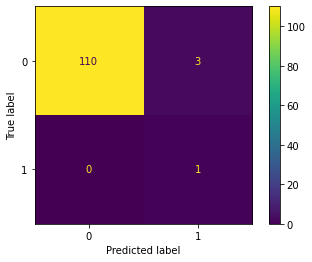

In [41]:
ConfusionMatrixDisplay.from_estimator(model,X_test, y_test);